In [1]:
import numpy as np

from matplotlib import pyplot as plt

from qs_mps.mps_class import MPS
from qs_mps.utils import tensor_shapes, truncation, create_sequential_colors, mps_to_vector
from qs_mps.sparse_hamiltonians_and_operators import *

In [2]:
grid = np.linspace(0,1,32)
L = 12
chis = [2,4,8,16,32,64]
trunc_chi = True
trunc_tol = False
type_shape = "rectangular" # "trapezoidal"
long = "X"
trans = "Z"
eps = 1e-5

mag = []
ene = []
entr = []
sv = []
overlap = []
for chi in chis:
    mag_chi = []
    ene_chi = []
    entr_chi = []
    sv_chi = []
    overlap_chi = []

    mag_exact = []
    ene_exact = []
    v0 = np.full(2**L, (1/np.sqrt(2))**L)
    sparse = True
    init_state = np.full((1, 2, 1), (1/np.sqrt(2)))
    init_tensor = [init_state for _ in range(L)]

    for k in grid:
        print(f"ground state search for k: {k}, chi: {chi}")
        chain = MPS(L=L,d=2,model="ANNNI",chi=chi, eps=eps, J=1, h=1e-3, k=k)
        chain._random_state(seed=3, type_shape=type_shape)
        chain.sites = init_tensor.copy()
        chain.enlarge_chi()
        # chain.canonical_form(trunc_chi=trunc_chi, trunc_tol=trunc_tol)
        energy, entropy, schmidt_vals = chain.DMRG(trunc_chi=trunc_chi, trunc_tol=trunc_tol, n_sweeps=8, conv_tol=1e-12, long=long, trans=trans, where=L//2)
        init_tensor = chain.sites.copy()
        chain.order_param(op=long)
        mag_chi.append(chain.mpo_first_moment().real/L)
        ene_chi.append(energy[-1])
        entr_chi.append(entropy)
        sv_chi.append(schmidt_vals)

        H = ANNNI(L=L, h=1e-3, k=k, eps=eps, deg_method=2)
        e, v = diagonalization(H, sparse=sparse, v0=v0)
        gs = v[:,0]
        ene_exact.append(e[0])
        mag_exact.append((gs.conjugate().T @ magnetization(L=L) @ gs).real)
        v0 = gs

        psi_mps = mps_to_vector(chain.sites)
        overlap_chi.append((gs.T @ psi_mps).real)
    mag.append(mag_chi)
    ene.append(ene_chi)
    entr.append(entr_chi)
    sv.append(sv_chi)
    overlap.append(overlap_chi)

ground state search for k: 0.0, chi: 2
Sweep n: 0

Sweep n: 1

##############################
The energy between the two last updated states converged
to an order of 1e-12 after:
1 sweeps at site 2
total iterations 23
total time: 0.07207110000308603
##############################
ground state search for k: 0.03225806451612903, chi: 2
Sweep n: 0

Sweep n: 1

##############################
The energy between the two last updated states converged
to an order of 1e-12 after:
1 sweeps at site 2
total iterations 23
total time: 0.050333900027908385
##############################


C:\Users\HP\Desktop\qs-mps\src\qs_mps\utils.py:380: RuntimeWarning: divide by zero encountered in log2
  return -np.sum((s**2) * np.log2(s**2))
C:\Users\HP\Desktop\qs-mps\src\qs_mps\utils.py:380: RuntimeWarning: invalid value encountered in multiply
  return -np.sum((s**2) * np.log2(s**2))
C:\Users\HP\Desktop\qs-mps\src\qs_mps\mps_class.py:407: ComplexWarning: Casting complex values to real discards the imaginary part
  extended_array[i][: shape[0], : shape[1], : shape[2]] = self.sites[i]


ground state search for k: 0.06451612903225806, chi: 2
Sweep n: 0

Sweep n: 1

##############################
The energy between the two last updated states converged
to an order of 1e-12 after:
1 sweeps at site 2
total iterations 23
total time: 0.06083209998905659
##############################
ground state search for k: 0.0967741935483871, chi: 2
Sweep n: 0

Sweep n: 1

##############################
The energy between the two last updated states converged
to an order of 1e-12 after:
1 sweeps at site 2
total iterations 23
total time: 0.04602730000624433
##############################
ground state search for k: 0.12903225806451613, chi: 2
Sweep n: 0

Sweep n: 1

##############################
The energy between the two last updated states converged
to an order of 1e-12 after:
1 sweeps at site 2
total iterations 23
total time: 0.04530739999609068
##############################
ground state search for k: 0.16129032258064516, chi: 2
Sweep n: 0

Sweep n: 1

##############################


In [3]:
# mag_exact = []
# ene_exact = []
# v0 = np.full(2**L, (1/np.sqrt(2))**L)
# sparse = True
# for k in grid:
#     H = ANNNI(L=L, h=0, k=k, eps=eps)
#     e, v = diagonalization(H, sparse=sparse, v0=v0)
#     gs = v[:,0]
#     ene_exact.append(e[0])
#     mag_exact.append((gs.conjugate().T @ magnetization(L=L) @ gs).real)
#     v0 = gs

<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\c'
C:\Users\HP\AppData\Local\Temp\ipykernel_6904\1015397328.py:4: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(grid, m, 'o', color=colors[i], label=f"$\chi={chi}$")


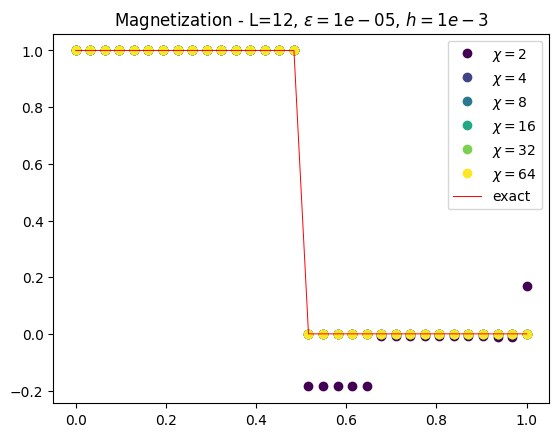

In [10]:
colors = create_sequential_colors(len(chis), colormap_name='viridis')
i = 0
for m, chi in zip(mag, chis):
    plt.plot(grid, m, 'o', color=colors[i], label=f"$\chi={chi}$")
    i += 1

plt.plot(grid, mag_exact, '-', color='red', linewidth=0.7, label="exact")
plt.title(f'Magnetization - L={L}, $\\varepsilon ={eps}$, $h=1e-3$')
plt.legend()
plt.show()

<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\c'
C:\Users\HP\AppData\Local\Temp\ipykernel_6904\4179583093.py:4: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(grid, np.abs(o), 'x-', color=colors[i], label=f"$\chi={chi}$")


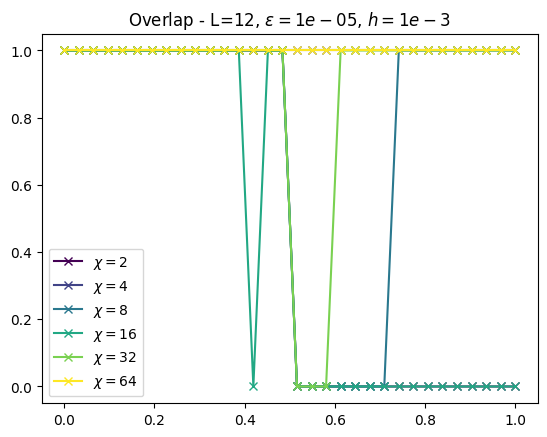

In [11]:
colors = create_sequential_colors(len(chis), colormap_name='viridis')
i = 0
for o, chi in zip(overlap, chis):
    plt.plot(grid, np.abs(o), 'x-', color=colors[i], label=f"$\chi={chi}$")
    i += 1

plt.title(f'Overlap - L={L}, $\\varepsilon ={eps}$, $h=1e-3$')
plt.legend()
plt.show()

<>:3: SyntaxWarning: invalid escape sequence '\c'
<>:3: SyntaxWarning: invalid escape sequence '\c'
C:\Users\HP\AppData\Local\Temp\ipykernel_6904\435675756.py:3: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(grid, e, 'x', color=colors[i], label=f"$\chi={chi}$")


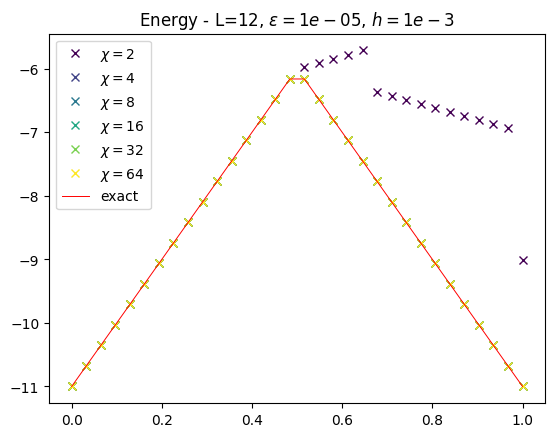

In [12]:
i = 0
for e, chi in zip(ene, chis):
    plt.plot(grid, e, 'x', color=colors[i], label=f"$\chi={chi}$")
    i += 1
plt.plot(grid, ene_exact, '-', color='red', linewidth=0.7, label="exact")
plt.title(f'Energy - L={L}, $\\varepsilon ={eps}$, $h=1e-3$')
plt.legend()
plt.show()

<>:3: SyntaxWarning: invalid escape sequence '\c'
<>:3: SyntaxWarning: invalid escape sequence '\c'
C:\Users\HP\AppData\Local\Temp\ipykernel_6904\2352940180.py:3: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(grid, e, 'x-', color=colors[i], linewidth=0.7, label=f"$\chi={chi}$")


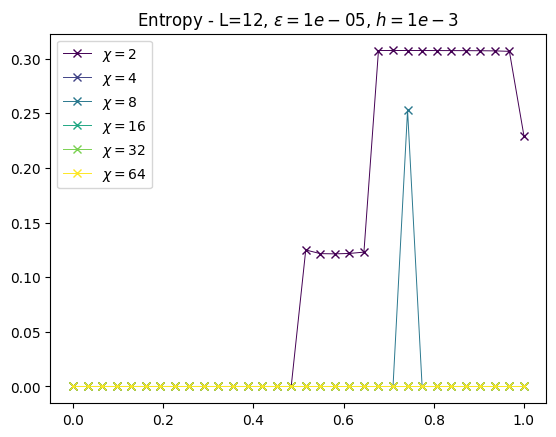

In [13]:
i = 0
for e, chi in zip(entr, chis):
    plt.plot(grid, e, 'x-', color=colors[i], linewidth=0.7, label=f"$\chi={chi}$")
    i += 1
plt.title(f'Entropy - L={L}, $\\varepsilon ={eps}$, $h=1e-3$')
plt.legend()
plt.show()

<>:10: SyntaxWarning: invalid escape sequence '\c'
<>:10: SyntaxWarning: invalid escape sequence '\c'
C:\Users\HP\AppData\Local\Temp\ipykernel_6904\807058034.py:10: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(grid, svals_trunc, 'x-', color=colors[i], linewidth=0.7, label=f"$\chi={chi}$")


[1.00000000e+00 6.24987656e-08]
[1.00000000e+00 7.13539114e-08]
[1.00000000e+00 8.20656845e-08]
[1.00000000e+00 9.51542185e-08]
[1.00000000e+00 1.11335504e-07]
[1.00000000e+00 1.31618759e-07]
[1.00000000e+00 1.57466608e-07]
[1.0000000e+00 1.9107042e-07]
[1.00000000e+00 2.35849278e-07]
[1.00000000e+00 2.97415091e-07]
[1.00000000e+00 3.85600009e-07]
[1.00000000e+00 5.19203952e-07]
[1.00000000e+00 7.38912811e-07]
[1.00000000e+00 1.15128761e-06]
[1.00000000e+00 2.14888884e-06]
[1.00000000e+00 7.27427693e-06]
[0.99140716 0.13081224]
[0.99169448 0.12861591]
[0.99171231 0.12847838]
[0.99168097 0.12872008]
[0.99157799 0.12951097]
[0.97209423 0.23459073]
[0.97209167 0.23460133]
[0.9720944  0.23459002]
[0.97209737 0.23457771]
[0.97210078 0.2345636 ]
[0.97210501 0.23454607]
[0.97211081 0.23452202]
[0.97211993 0.2344842 ]
[0.97213773 0.23441039]
[0.97219193 0.23418551]
[0.98121332 0.19292595]
[1.00000000e+00 6.24987817e-08 5.56317295e-15]
[1.00000000e+00 7.13539153e-08 1.67745902e-11 5.80983246e-1

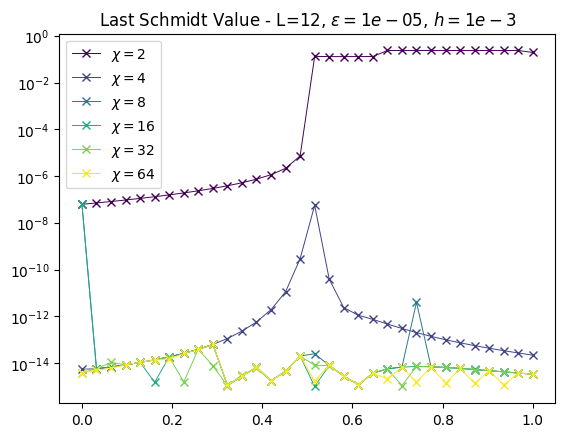

In [9]:
i = 0
for sv_chi, chi in zip(sv, chis):
    svals_trunc = []
    for s in sv_chi:
        condition = s[0] >= 1e-15
        s_trunc = np.extract(condition, s[0])
        s = s[0][:len(s_trunc)]
        print(s)
        svals_trunc.append(s[-1])
    plt.plot(grid, svals_trunc, 'x-', color=colors[i], linewidth=0.7, label=f"$\chi={chi}$")
    i += 1
plt.yscale('log')
plt.title(f'Last Schmidt Value - L={L}, $\\varepsilon ={eps}$, $h=1e-3$')
plt.legend()
plt.show()


In [2]:
grid = np.linspace(0,1,32)
L = 12
chi = 64
trunc_chi = True
trunc_tol = False
type_shape = "rectangular" # "trapezoidal"
long = "X"
trans = "Z"
eps = 1e-5

mag = []
sv = []
rdms = []

for h in grid:
    init_chain = MPS(L=L,d=2,model="Ising",chi=chi, eps=eps, J=1, h=h, k=0)
    init_chain._random_state(seed=3, type_shape=type_shape)
    init_chain.canonical_form(trunc_chi=trunc_chi, trunc_tol=trunc_tol)
    init_chain.DMRG(trunc_chi=trunc_chi, trunc_tol=trunc_tol, n_sweeps=8, conv_tol=1e-12, long=long, trans=trans)
    rdm_h = []
    mag_h = []
    sv_h = []
    for k in grid:
        print(f"ground state search for k: {k}, h: {h}")
        chain = MPS(L=L,d=2,model="ANNNI",chi=chi, eps=eps, J=1, h=h, k=k)
        # chain._random_state(seed=3, type_shape=type_shape)
        chain.sites = init_chain.sites.copy()
        chain.enlarge_chi()
        # chain.canonical_form(trunc_chi=trunc_chi, trunc_tol=trunc_tol)
        energy, entropy, schmidt_vals = chain.DMRG(trunc_chi=trunc_chi, trunc_tol=trunc_tol, n_sweeps=8, conv_tol=1e-12, long=long, trans=trans, where=L//2)
        init_chain.sites = chain.sites.copy()
        chain.order_param(op=long)
        mag_h.append(chain.mpo_first_moment().real/L)
        sv_h.append(schmidt_vals)
        rdm = chain.reduced_density_matrix(sites=[L//2,L//2+1])
        rdm_h.append(rdm)
    mag.append(mag_h)
    sv.append(sv_h)
    rdms.append(rdm_h)

Sweep n: 0

Sweep n: 1

##############################
The energy between the two last updated states converged
to an order of 1e-12 after:
1 sweeps at site 2
total iterations 23
total time: 0.6929830999579281
##############################
ground state search for k: 0.0, h: 0.0
Sweep n: 0



C:\Users\HP\Desktop\qs-mps\src\qs_mps\mps_class.py:407: ComplexWarning: Casting complex values to real discards the imaginary part
  extended_array[i][: shape[0], : shape[1], : shape[2]] = self.sites[i]


Sweep n: 1

##############################
The energy between the two last updated states converged
to an order of 1e-12 after:
1 sweeps at site 2
total iterations 23
total time: 0.9269332999829203
##############################
ground state search for k: 0.03225806451612903, h: 0.0
Sweep n: 0

Sweep n: 1

##############################
The energy between the two last updated states converged
to an order of 1e-12 after:
1 sweeps at site 2
total iterations 23
total time: 1.0240389000391588
##############################
ground state search for k: 0.06451612903225806, h: 0.0
Sweep n: 0

Sweep n: 1

##############################
The energy between the two last updated states converged
to an order of 1e-12 after:
1 sweeps at site 2
total iterations 23
total time: 1.0243826999794692
##############################
ground state search for k: 0.0967741935483871, h: 0.0
Sweep n: 0

Sweep n: 1

##############################
The energy between the two last updated states converged
to an order o

In [3]:
path_rdms = "C:/Users/HP/Desktop/fidelity-phase-tran"
np.save(f"{path_rdms}/results/data/X_2-rdms_dmrg_L_12_h-k_0.0-1.0_delta_32_degeneracy_method_2.npy", rdms)